# Example 1: Computing sensitivies for our CFD example

In [3]:
from equadratures import *
import numpy as np
import matplotlib.pyplot as plt
import warnings
from copy import deepcopy
warnings.filterwarnings("ignore")

%matplotlib notebook

## 1. Load up our CFD example from earlier

Lets quickly setup the CFD example from earlier...

**Hint:** We want to use a ``'tensor-grid'`` basis and ``'numerical-integration'``.

In [4]:
# Define parameters, basis and poly
s1 = Parameter(distribution='uniform', lower=1.0, upper=100, order=3) #turb2lamviscosity
s2 = Parameter(distribution='Gaussian', shape_parameter_A=10, shape_parameter_B=5, order=3) #Ti
mybasis = Basis('tensor-grid')
mypoly = Poly(parameters=[s1,s2], basis=mybasis, method='numerical-integration')

# Load the Yp data
Yp = np.load('lossarray_sst.npy').reshape(-1, 1)

# Find the coefficients
mypoly.set_model(Yp)

## 2. Computing sobol indices

Firstly, lets compute the first order sobol indices $S_i$ using ``get_sobol_indices()``.

In [12]:
mypoly.get_sobol_indices(order=1)

{(0,): 0.8402230587096422, (1,): 0.13229796898549417}

Clearly, $Y_p$ is significantly more sensitive to $s_1$ ($\nu_t/\nu$) than $s_2$ ($Ti$).

We can also get the second order (interaction) sobol index.

In [10]:
mypoly.get_sobol_indices(order=2)

{(0, 1): 0.027478972304863736}

This tells us the sensitivity to changing both of the input parameters together.

## 3. Obtaining a surrogate model

We can obtain a a surrogate model $\hat{f}(s_1,s_2)$ from ``mypoly`` with ``get_polyfit``. Lets plot this to visualise the model's response to our parameters $s_1$ and $s_2$. 

<IPython.core.display.Javascript object>


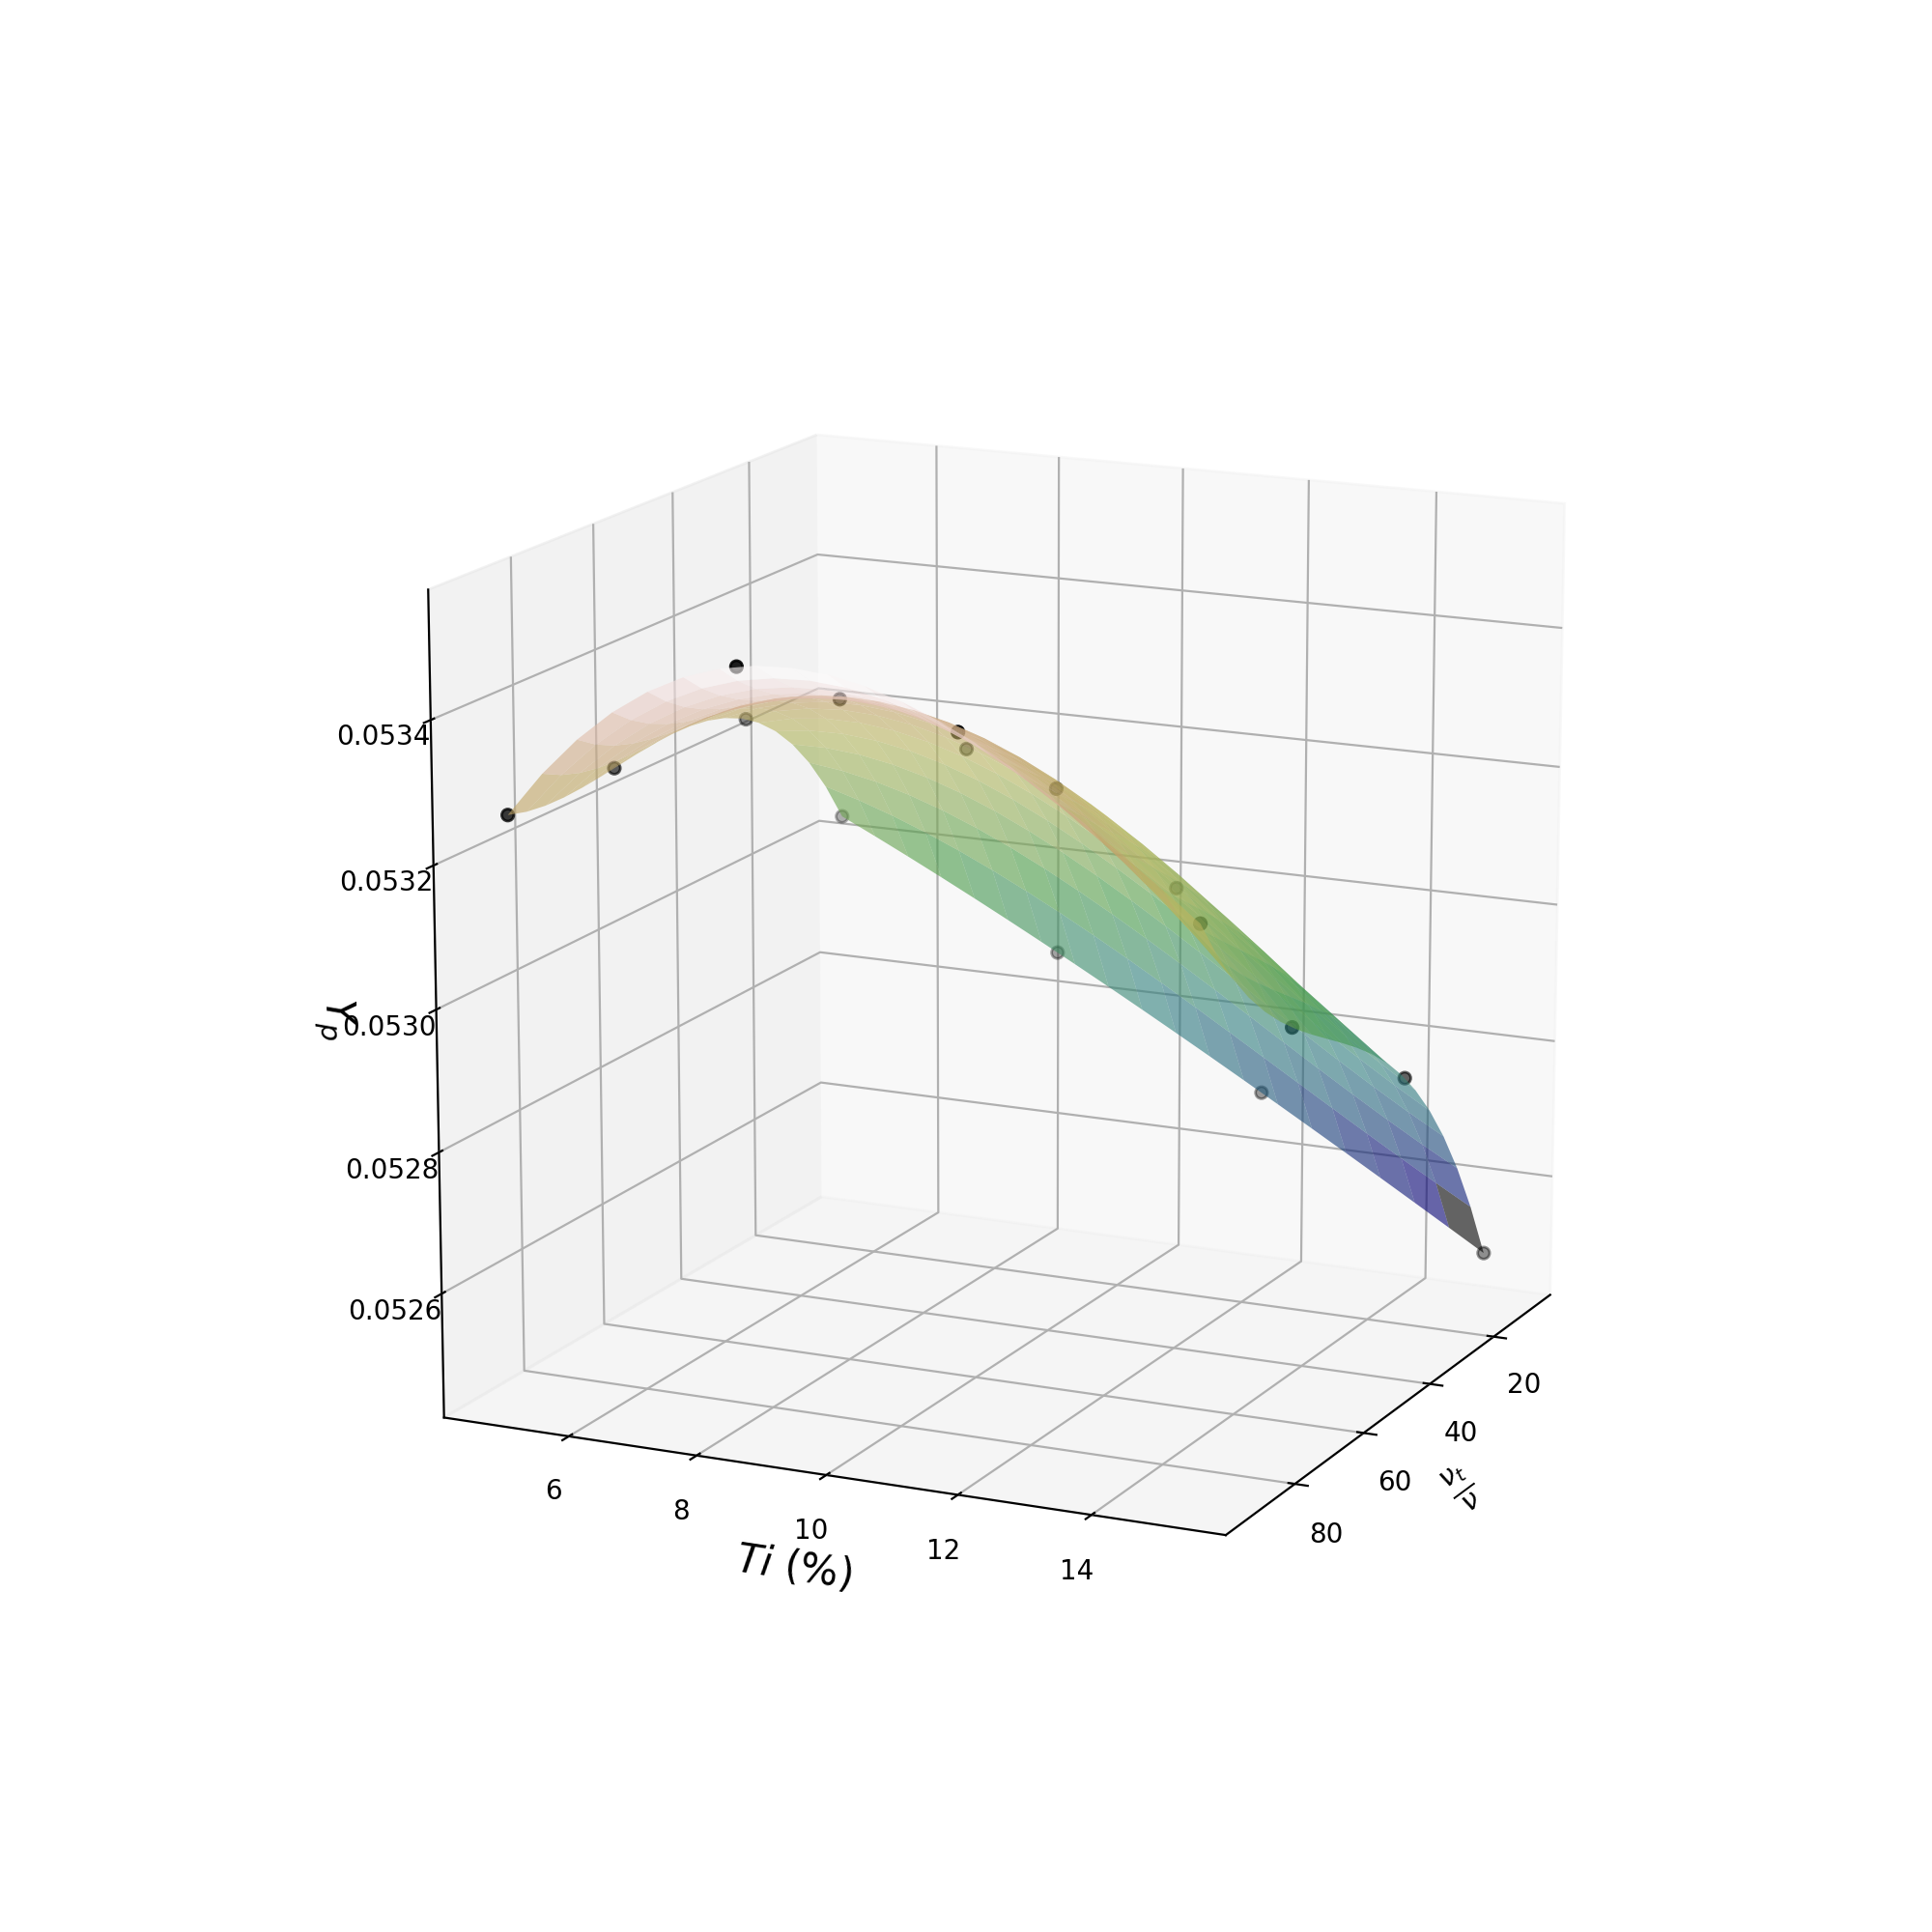

In [13]:
# Get the mypolyfit model
mypolyfit = mypoly.get_polyfit

# Get the sampling points
pts = mypoly.get_points()

# PLOTTING STUFF BELOW - CAN IGNORE!
# Sample the polyfit at N number of points so we can plot it
N = 20
s1_samples = np.linspace(pts[0,0], pts[-1,0], N)
s2_samples = np.linspace(pts[0,1], pts[-1,1], N)
[S1, S2] = np.meshgrid(s1_samples, s2_samples)
S1_vec = np.reshape(S1, (N*N, 1))
S2_vec = np.reshape(S2, (N*N, 1))
samples = np.hstack([S1_vec, S2_vec])
PolyDiscreet = mypolyfit( samples )
PolyDiscreet = np.reshape(PolyDiscreet, (N, N))

# Init a 3d graph
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Plot the discretised poly PolyDiscreet as a surface
surf = ax.plot_surface(S1, S2, PolyDiscreet, rstride=1, cstride=1, cmap=cm.gist_earth, linewidth=0, alpha=0.6, label='Tensor grid')
# Plot the actual doe points as black circles
scatter = ax.scatter(pts[:,0],pts[:,1],Yp, c='k', marker='o')

ax.set_xlabel(r'$\frac{\nu_t}{\nu}$', fontsize=15)
ax.set_ylabel(r'$Ti$ ($\%$)', fontsize=15)
ax.set_zlabel(r'$Y_p$', fontsize=15)
ax.view_init(15, 25)
plt.show()

## 4. Turn your sound on!¶

In [11]:
mypoly.get_summary('data.txt',tosay=True)
os.system('say -f data.txt')

0